<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librerías-y-funciones" data-toc-modified-id="Librerías-y-funciones-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librerías y funciones</a></span></li><li><span><a href="#Carga-de-datos" data-toc-modified-id="Carga-de-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carga de datos</a></span></li><li><span><a href="#Coeficientes-de-correlación" data-toc-modified-id="Coeficientes-de-correlación-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Coeficientes de correlación</a></span><ul class="toc-item"><li><span><a href="#Ejemplo-1" data-toc-modified-id="Ejemplo-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ejemplo 1</a></span></li><li><span><a href="#Ejemplo-2" data-toc-modified-id="Ejemplo-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ejemplo 2</a></span></li></ul></li></ul></div>

##  Librerías y funciones

In [18]:
import itertools
import matplotlib.patches as mpl_patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr, kendalltau, pearsonr


from sklearn.datasets import  load_breast_cancer


In [35]:
def correlaciones_2features(dataset,feature1,feature2):
    figura,axes = plt.subplots(1,3, figsize=(15,5))
    sns.scatterplot(dataset[feature1],dataset[feature2], ax = axes[0])
    axes[0].grid()
    lineas_de_texto = 3
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * lineas_de_texto
    labels = []
    labels.append("spearman = {0:.4g}".format(spearmanr(dataset[feature1], 
                                                    dataset[feature2])[0]))
    labels.append("kendall = {0:.4g}".format(kendalltau(dataset[feature1], 
                                                    dataset[feature2])[0]))
    axes[0].legend(handles, labels, loc='best', fontsize='medium', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
    axes[0].tick_params(labelleft=True)
    sns.distplot(dataset[feature1], ax=axes[1]).set_title(feature1)
    axes[1].grid()
    axes[1].set_xlabel('') 
    sns.distplot(cancer_df[feature2], ax=axes[2]).set_title(feature2)
    axes[2].grid()
    axes[2].set_xlabel('')

    plt.show()

In [20]:
def decision(pvalue, alpha):
    if pvalue < alpha:
        print('Decisión: Rechazar H0')
    else:
        print('Decisión: No Rechazar H0')

## Carga de datos

Vamos a utilizar el dataset de sklearn que cuenta con diferentes atributos relacionados con tumores de cáncer.

In [21]:
cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [22]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = pd.Series(cancer.target)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Coeficientes de correlación

Los coeficientes de correlación de Pearson, Spearman y Kendall pueden ser calculados utilizando las funciones <code>pearsonr()</code>, <code>spearmanr()</code> y <code>kendalltau()</code> de la librería Scipy https://scipy.org/scipylib/ 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html

### Ejemplo 1

Para comenzar, consideremos las variables ***mean texture*** y ***worst texture*** las cuales parecen presentar una distribución muy cercana a ser normal como se observa a continuación:

**NOTA IMPORTANTE:** 
- Idealmente primero debe aplicarse el test de normalidad para identificar cual es el coeficiente más adecuado a los datos.
- Más info sobre tests de normalidad --> https://github.com/PiConsulting/Pensadero/blob/master/Eventos/2020/2020-09-17_Estadistica-2/Test%20Parametricos%20con%20Python.ipynb.

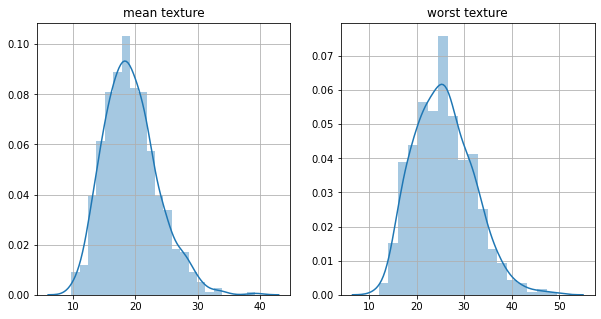

In [23]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(cancer_df['mean texture'].dropna(), axlabel = False, ax =axes[0]).set_title('mean texture')
axes[0].grid()
sns.distplot(cancer_df['worst texture'].dropna(), axlabel = False, ax =axes[1]).set_title('worst texture')
axes[1].grid()
plt.show()

Planteamos las hipótesis del test de correlación:

- **H0**: No existe correlación entre las variables *mean texture* y *worst texture*.

- **H1**: Existe correlación entre las variables *mean texture* y *worst texture*.

- **Nivel de significación: $\alpha$**= 0.05.

Calculamos el coeficiente de Pearson junto con su p valor:

In [24]:
pearson_coef,pearson_pvalue = pearsonr(cancer_df['mean texture'],cancer_df['worst texture'])
print('Pearson coeficiente',pearson_coef,'\n','Pearson pvalue:',pearson_pvalue)

Pearson coeficiente 0.9120445888404216 
 Pearson pvalue: 1.1692595320860938e-221


In [25]:
decision(pearson_pvalue, 0.05)

Decisión: Rechazar H0


Existe correlación entre las variables.

### Ejemplo 2

Consideremos ahora el caso de las variables ***mean radius*** y ***worst area***, cuyas distribuciones son las siguientes:

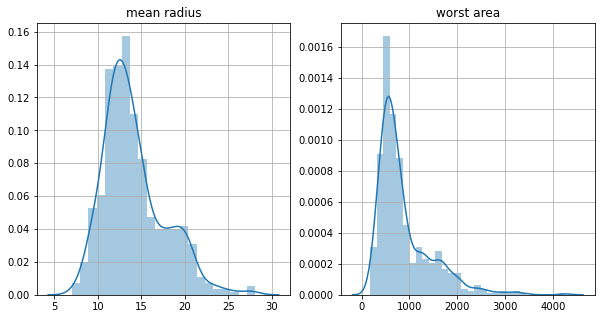

In [26]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(cancer_df['mean radius'].dropna(), axlabel = False, ax =axes[0]).set_title('mean radius')
axes[0].grid()
sns.distplot(cancer_df['worst area'].dropna(), axlabel = False, ax =axes[1]).set_title('worst area')
axes[1].grid()
plt.show()

En este caso, elegimos trabajar con Spearman y Kendall debido a que las variables a simple vista no tienen distribución normal (de todas maneras, es recomendable aplicar el test de normalidad). Las hipótesis del test son las mismas que las del ejemplo anterior, solo cambia el estadístico elegido.

In [29]:
spearman_coef, spearman_pvalue = spearmanr(cancer_df['mean radius'],cancer_df['worst area'])
kendall_coef, kendall_pvalue  = kendalltau(cancer_df['mean radius'],cancer_df['worst area'])


In [30]:
print('Spearman:',spearman_coef,
      '\n',
        'Spearman_pvalue:',spearman_pvalue,
        '\n \n',
      'Kendall:',kendall_coef,
      '\n',
    'Kendall_pvalue:',kendall_pvalue,
)

Spearman: 0.9788626109712246 
 Spearman_pvalue: 0.0 
 
 Kendall: 0.882035231418031 
 Kendall_pvalue: 4.472900075864796e-217


In [31]:
print('Spearman:')
decision(spearman_pvalue, 0.05)

Spearman: 
Decisión: Rechazar H0


In [33]:
print('Kendall:') 
decision(kendall_pvalue, 0.05)

Kendall:
Decisión: Rechazar H0


Por lo tanto, existe correlación entre ambas variables.

El gráfico de dispersión a continuación nos muestra que la relación entre ambas variables no es lineal pero si monótona, lo cual es coherente con las hipótesis asumidas por Spearman y Kendall.

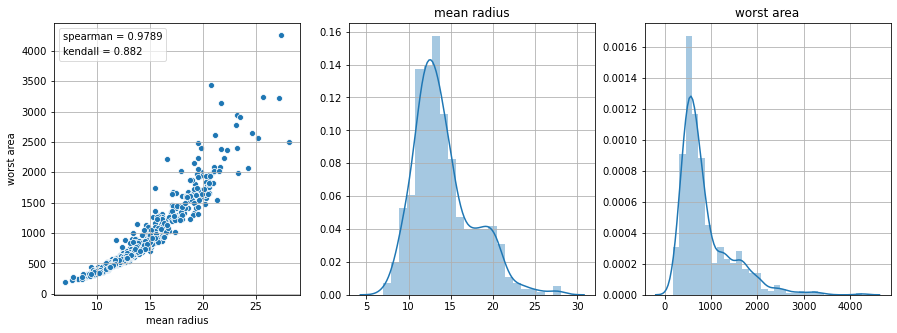

In [36]:
correlaciones_2features(cancer_df,'mean radius','worst area')